
# 7-1-6 Predicting cars price 

![cover-landing-spanish19-SF.webp](cover-landing-spanish19-SF.webp)


**Machine Learning** application arises when problems require many adjustments, long lists of rules, or it is necessary to have an understanding of a complex problem.



To make good use of **ML** techniques the first thing we have to do is know how many techniques exist and which is the most appropriate for our need, each of the different types of learning has its particularities:


![ML_types.png](ML_types.png)



- **Supervised Learning**:

 - Performing a typical classification task is usually done with this type of learning.

 - Make predictions of a target numerical value.





- **Unsupervised Learning**:

 - Grouping.

 - Anomaly detection.

 - Visualization and dimensionality reduction and association rules are the fields where this technique must be applied.





- **Semi-Supervised Learning**:

 - In the end it is to make use of both, some algorithms can take care of the data that is labeled in part of the dataset and another use some kind of unsupervised learning, such as making use of a facial recognition algorithm (unsupervised grouping) and then labeling it by means of supervised learning





- **Reinforcement learning**:

 - The learning system is called **agent**, it can:
      - observe, select, perform actions and receive rewards, these reinforce some actions or discard others
      - Its objective is to learn what is the best strategy by itself.



_______________________



The **price prediction** is a very interesting field since it complies with what has been said above and therefore introduces us fully to the details of **ML**.


If we want to make a **price prediction** of our car dataset the use of **supervised learning** is a good choice as we have seen. 


Now that we know what kind of learning we are going to carry out, what we will do is load the data.

## Loading data



In [1]:
import pandas as pd
import numpy as np

In [2]:
cars = pd.read_csv("imports-85.data")
cars.head(5)

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


This is the initial aspect of our dataset, something is not working correctly.

First thing is see what type of file we are dealing with since it does not behave as we expect.


### What type of file are?

One of the default comands that come installed in linux distributions is [file](https://www.man7.org/linux/man-pages/man1/file.1.html), this command tests each argument in an attempt to classify it.


**-i, --mime**

    Causes the file command to output mime type strings rather
    than the more traditional human readable ones.  Thus it may
    say ‘text/plain; charset=us-ascii’ rather than “ASCII
    text”.

**-k, --keep-going**

    Don't stop at the first match, keep going.  Subsequent
    matches will be have the string ‘\012- ’ prepended.  (If
    you want a newline, see the -r option.)  The magic pattern
    with the highest strength (see the -l option) comes first.

In [3]:
!file -i -k imports-85.data

imports-85.data: application/csv\012- text/plain; charset=us-ascii


### Whats inside the file?

In [4]:
!head imports-85.data

3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,168.80,64.10,48.80,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,168.80,64.10,48.80,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500
1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.50,171.20,65.50,52.40,2823,ohcv,six,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500
2,164,audi,gas,std,four,sedan,fwd,front,99.80,176.60,66.20,54.30,2337,ohc,four,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950
2,164,audi,gas,std,four,sedan,4wd,front,99.40,176.60,66.40,54.30,2824,ohc,five,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450
2,?,audi,gas,std,two,sedan,fwd,front,99.80,177.30,66.30,53.10,2507,ohc,five,136,mpfi,3.19,3.40,8.50,110,5500,19,25,15250
1,158,audi,gas,std,four,sedan,fwd,front,105.80,192.70,71.40,55.70,2844,ohc,five,136,mpfi,3.19,3.40,8.50,110,5500,19,25,17710
1,?,audi,gas,std,four,wagon,fwd,front,105.80,192.70,71.40,55.70,2954,ohc,five,136,mpfi,3.19,3.40,8.50,1

We know it's a **plain text** document separated by commas (**csv**), which a **us-ascii** charset apparently without columns!. 

To get more information about the dataset we should go to the source.

https://archive.ics.uci.edu/ml/datasets/automobile


We can see which are the columns that make up the dataset.


|Attribute Information:||
|:----|:----|
|Attribute: |Attribute Range|
|1. symboling: |-3, -2, -1, 0, 1, 2, 3.|
|2. normalized-losses: |continuous from 65 to 256.|
|3. make: |alfa-romero, audi, bmw, chevrolet, dodge, 
||honda, isuzu, jaguar, mazda, mercedes-benz, volvo,|
||mercury,mitsubishi, nissan, peugot, plymouth, 
||porsche, renault, saab, subaru, toyota, volkswagen,|
|4. fuel-type: |diesel, gas.|
|5. aspiration: |std, turbo.|
|6. num-of-doors: |four, two.|
|7. body-style: |hardtop, wagon, sedan, hatchback, convertible.|
|8. drive-wheels: |4wd, fwd, rwd.|
|9. engine-location: |front, rear.|
|10. wheel-base: |continuous from 86.6 120.9.|
|11. length: |continuous from 141.1 to 208.1.|
|12. width: |continuous from 60.3 to 72.3.|
|13. height: |continuous from 47.8 to 59.8.|
|14. curb-weight: |continuous from 1488 to 4066.|
|15. engine-type: |dohc, dohcv, l, ohc, ohcf, ohcv, rotor.|
|16. num-of-cylinders: |eight, five, four, six, three, twelve, two.|
|17. engine-size: |continuous from 61 to 326.|
|18. fuel-system: |1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.|
|19. bore: |continuous from 2.54 to 3.94.|
|20. stroke: |continuous from 2.07 to 4.17.|
|21. compression-ratio: |continuous from 7 to 23.|
|22. horsepower: |continuous from 48 to 288.|
|23. peak-rpm: |continuous from 4150 to 6600.|
|24. city-mpg: |continuous from 13 to 49.|
|25. highway-mpg: |continuous from 16 to 54.|
|26. price: |continuous from 5118 to 45400.|


Now we know what is the structure of the colummns so create a list with the name of the columns:

In [5]:
col = ['symboling','normalized_losses','make','fuel_type','aspiration','num_doors','body_style',
       'drive_wheels', 'engine_location','wheel_base','length','width','height','curb_weight'
       ,'engine_type', 'num_cylinders','engine_size','fuel_system','bore','stroke',
       'compression_ratio','horsepower','peak_rpm','city_mpg','highway_mpg', 'price']

Studying the [documentation](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) we see that we can enter in our dataset the name of the columns in an appropriate way
    
- `file-name`: the name of the file. 

- `sep`: the separations between the elements (the commas)

- `header=0`: Row number(s) to use as the column names, and the start of the data.

- `names=col`: List of column names to use. If the file contains a header row, then you should explicitly pass `header=0` to override the column names. 

- `usecols=lambda x:x in col`:Return a subset of the columns.If callable, the callable function will be evaluated against the column names, returning names where the callable function evaluates to True. 

In [6]:
cars = pd.read_csv("imports-85.data",sep=",",header=0, names=col, usecols=lambda x:x in col)
cars.head(5)

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [7]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          204 non-null    int64  
 1   normalized_losses  204 non-null    object 
 2   make               204 non-null    object 
 3   fuel_type          204 non-null    object 
 4   aspiration         204 non-null    object 
 5   num_doors          204 non-null    object 
 6   body_style         204 non-null    object 
 7   drive_wheels       204 non-null    object 
 8   engine_location    204 non-null    object 
 9   wheel_base         204 non-null    float64
 10  length             204 non-null    float64
 11  width              204 non-null    float64
 12  height             204 non-null    float64
 13  curb_weight        204 non-null    int64  
 14  engine_type        204 non-null    object 
 15  num_cylinders      204 non-null    object 
 16  engine_size        204 non

## Cleaning the dataset

Apparently there are no empty columns and either don't seem to have `NaN` values in the columns,however in the `column normalized_losses` that is of `object type` initially we see values represented by `?`, let's see if that phenomenon is repeated in the other columns:

In [8]:
print('name_columns: \t  diff_values  current_type: \n')
for col in cars.columns:
    if ('?' in cars[col].value_counts()):
        long = len(cars[col].value_counts())
        print("{col}  \t {long} \t {typ}".format(col = col.ljust(15),
                                              long = long,
                                              typ=cars[col].dtype))

name_columns: 	  diff_values  current_type: 

normalized_losses  	 52 	 object
num_doors        	 3 	 object
bore             	 39 	 object
stroke           	 37 	 object
horsepower       	 60 	 object
peak_rpm         	 24 	 object
price            	 186 	 object


It seems that we have more characters `?` within our dataset, instead of going column by column, lets apply it throughout the dataset replacing it with `NaN` values.

In [9]:
# replacing '?' in columns
for col in cars.columns:
    if ('?' in cars[col].value_counts()):
        cars[col] = cars[col].replace('?', np.NaN) #.copy()

In [10]:
# check if this work
for col in cars.columns:
    if ('?' in cars[col].value_counts()):
        l = len(cars[col].value_counts())
        print("{col}  \t diff_values: {l} \t current_type: {typ}".format(col = col[:],
                                                                         l = l,
                                                                         typ=cars[col].dtype))

The function no longer returns anything to us therefore the characters `?` is no longer exist anymore in the dataset.

_______________________________________


Because there are columns that return two or more differents outputs, we will determine what they are and how we have to clean that data, this will help us in the choice of the columns to carry out the model.

In [11]:
def output_options(options):
    print('name_column\t output variation \tcurrent_type:\n',)
    for col in cars.columns:
        if ('?' not in cars[col].value_counts()) and (len(cars[col].value_counts()))>=options:
            l = (len(cars[col].value_counts()))
            print("{col}  \t {l} \t {typ}".format(col = col.ljust(15), l = l, typ=cars[col].dtype))

This function seeks to show the number of variations in the output of each column and that do NOT have the character of unicamante interrogation for prevention.

In [12]:
output_options(2)

name_column	 output variation 	current_type:

symboling        	 6 	 int64
normalized_losses  	 51 	 object
make             	 22 	 object
fuel_type        	 2 	 object
aspiration       	 2 	 object
num_doors        	 2 	 object
body_style       	 5 	 object
drive_wheels     	 3 	 object
engine_location  	 2 	 object
wheel_base       	 53 	 float64
length           	 75 	 float64
width            	 44 	 float64
height           	 49 	 float64
curb_weight      	 171 	 int64
engine_type      	 7 	 object
num_cylinders    	 7 	 object
engine_size      	 44 	 int64
fuel_system      	 8 	 object
bore             	 38 	 object
stroke           	 36 	 object
compression_ratio  	 32 	 float64
horsepower       	 59 	 object
peak_rpm         	 23 	 object
city_mpg         	 29 	 int64
highway_mpg      	 30 	 int64
price            	 185 	 object


### Selected columns

The select columns are the following and have to make a change of data type as indicated in the following table.

|||||
|:--|:--|:--|:--|
|**Name column:**|**Output options:**|**Current type data:**|**to convert**|
|symboling|6|int64|int 64|
|normalized_losses |52 	|current_type: **object** |int 64|
|horsepower  	     |60 	 |current_type: **object** |int 64|
|peak_rpm  	     | 24 	 |current_type: **object** |to int 64|
|**price**  	         |**186** 	 |**current_type**: **object** |**to float**|
|fuel_type |2 |**object**|to 1 and 0| 
|aspiration |2 |**object**|to 1 and 0| 
|engine_location |2 |**object**|to 1 and 0|
|num_cylinders|7|**object**|int 64|
|engine_size|  	 44 	 |int64|**to cubic centimiters**|
|highway_mpg|  	 30 	 |int64|**to liters/100km**|
|city_mpg|  	 30 	 |int64|**to liters/100km**|


Before converting to the type of data we need, let's see if we have **NaN** values in the columns we have chosen.

In [13]:
cars.isna().sum()

symboling             0
normalized_losses    40
make                  0
fuel_type             0
aspiration            0
num_doors             2
body_style            0
drive_wheels          0
engine_location       0
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
num_cylinders         0
engine_size           0
fuel_system           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

Indeed we have the column of `normalized_looses` and `price` that we will solve it by making an average of its values.

The `num_doors` is a column that we will not will choose so we leave it as it is, the same goes for `bore` and `stroke`

The rows in which `horsepower`is lacking and `peak_rpm` coincidentally are the same:

In [14]:
cars[cars['horsepower'].isna()]

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
129,0,NaN,renault,gas,std,four,wagon,fwd,front,96.1,...,132,mpfi,3.46,3.90,8.7,NaN,NaN,23,31,9295
130,2,NaN,renault,gas,std,two,hatchback,fwd,front,96.1,...,132,mpfi,3.46,3.90,8.7,NaN,NaN,23,31,9895


To know what was the `horsepower`, first step was to start by the brand of the model (Renault) so I have had to transform the cubic inches that are the units in which work in the United States by cubic centimeters and see that models with same compression ratio.

This was the result of the search:

- https://www.auto-data.net/en/renault-safrane-i-b54-2.2-b543-137hp-10744

In [15]:
cars.loc[129:131:,'horsepower'] = 137 

In [16]:
cars.loc[129:131:,'peak_rpm'] = 5750 

In [17]:
cars.iloc[129:131]

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
129,0,NaN,renault,gas,std,four,wagon,fwd,front,96.1,...,132,mpfi,3.46,3.90,8.7,137,5750,23,31,9295
130,2,NaN,renault,gas,std,two,hatchback,fwd,front,96.1,...,132,mpfi,3.46,3.90,8.7,137,5750,23,31,9895


That seems to me a result quite adjusted to reality, revolutions are not exact but it is better than making an average of all the values of the series.


The main objective is to prepare the data to be able to **normalize** them, for them they must be converted.

This function  `data_converter` input the type of data we want and in the case that there are values `NaN` makes an average with the remaining values of the series.

In [18]:
def data_converter(serie, data_out):
    try:
        cars[serie] = cars[serie].astype(data_out)
        cars[serie] = cars[serie].fillna(cars[serie].mean())
    except NameError:
        
        pass

### Converting columns from: `object` type (str) to `int 64`

|||||
|:--|:--|:--|:--|
|**Name column:**|**Output options:**|**Current type data:**|**to convert**|
|symboling|6|int64|int 64|
|normalized_losses |52 	|current_type: **object** |int 64|
|horsepower  	     |60 	 |current_type: **object** |int 64|
|peak_rpm  	     | 24 	 |current_type: **object** |to int 64|
|**price**  	         |**186** 	 |**current_type**: **object** |**to float**|

In [19]:
to_int = ['normalized_losses','peak_rpm','horsepower','price']

In [20]:
data_converter(to_int,'float') # NaN is a float type
data_converter(to_int,'int')

### Converting the columns from: `object` type (str) to `int 64` (as binary)

These columns are important for the study of the price of the vehicle.

`fuel_type`, `aspiration`, `engine_location`

|||||
|:--|:--|:--|:--|
|**Name column:**|**Output options:**|**Current type data:**|**to convert**|
|fuel_type |2 |**object**|to 1 and 0| 
|aspiration |2 |**object**|to 1 and 0| 
|engine_location |2 |**object**|to 1 and 0|

In [21]:
cars['fuel_type'].value_counts()

gas       184
diesel     20
Name: fuel_type, dtype: int64

In [22]:
cars['aspiration'].value_counts()

std      167
turbo     37
Name: aspiration, dtype: int64

In [23]:
cars['engine_location'].value_counts()

front    201
rear       3
Name: engine_location, dtype: int64

The **category with the largest number** is the most important therefore we will assign a one to this and a zero to the other.

In [24]:
def most_frequent_value(val):
    if val == 'gas':
        return 1
    elif val == 'std':
        return 1
    elif val == 'front':
        return 1
    else:
        return 0

Having two output states what I do is directly convert one of them (the one that has more values and therefore more important in our study is) and give it a weight of 1 while the other I give a weight of 0.

In [25]:
dual_categories = ['fuel_type','aspiration','engine_location'] 

for name_categories in dual_categories:
    cars[name_categories] = cars[name_categories].apply(most_frequent_value).copy()

### Converting `cylinders` columns from: `object` type (str) to `int 64`

The number of cylinders in a car is a very important parameter to take into account, since the more cylinders and complex the engine is, the more money it will cost


We convert the type **text** cylinders to **numeric** type

|||||
|:--|:--|:--|:--|
|**Name column:**|**Output options:**|**Current type data:**|**to convert**|
|num_cylinders|7|**object**|int 64|

In [26]:
# From categorical to numerical
def cylinders(val):
    if val == 'twelve':
        return 12
    elif val == 'eight':
        return 8
    elif val == 'six':
        return 6
    elif val == 'five':
        return 5
    elif val == 'four':
        return 4
    elif val == 'three':
        return 3
    else:
        return 2

In [27]:
cars['num_cylinders'] = cars['num_cylinders'].map(cylinders).copy()

### Conversion of the `Imperial System` to the `Decimal Metric System`.

This step is not necessary to carry out the study but it is necessary to understand what data we are working on.

To convert the [**displacement**](https://en.wikipedia.org/wiki/Engine_displacement) of the engine we need to do this conversion:

`$in^3$ = 16,387064 $cm^3$`

In [28]:
cars['engine_size'] = cars['engine_size'].rmul(16,387064) #vectorial function
cars['engine_size']

0      2080
1      2432
2      1744
3      2176
4      2176
       ... 
199    2256
200    2256
201    2768
202    2320
203    2256
Name: engine_size, Length: 204, dtype: int64

Also we need change the **consumption** going from **miles per gallon to amount of Liters every 100 kilometers**.

`L/100Km = 235.214583 / mpg`

In [29]:
K = 235.214583
cars['highway_liters100Km'] = K / cars['highway_mpg'] #non vectorial function
cars['highway_liters100Km'].head()

0     8.711651
1     9.046715
2     7.840486
3    10.691572
4     9.408583
Name: highway_liters100Km, dtype: float64

In [30]:
K = 235.214583
cars['city_liters100Km'] = K / cars['city_mpg'] #non vectorial function
cars['city_liters100Km'].head()

0    11.200694
1    12.379715
2     9.800608
3    13.067477
4    12.379715
Name: city_liters100Km, dtype: float64

In [31]:
lb = 2.2046
cars['tara'] = cars['curb_weight'].div(lb) #vectorial function
cars['tara'].head() # Kgr

0    1155.765218
1    1280.504400
2    1060.056246
3    1280.957997
4    1137.167740
Name: tara, dtype: float64

### Now we have the columns ready to work with them, let's eliminate those features that we do not need.

In [32]:
drop_columns = ['bore','stroke','fuel_system', 'engine_type','height','width','length','curb_weight',
                'wheel_base','drive_wheels','body_style','num_doors','make', 'price','city_mpg','highway_mpg']
df_cars=cars.drop(drop_columns, axis=1).copy()

### Profitable columns

In [33]:
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   symboling            204 non-null    int64  
 1   normalized_losses    204 non-null    int64  
 2   fuel_type            204 non-null    int64  
 3   aspiration           204 non-null    int64  
 4   engine_location      204 non-null    int64  
 5   num_cylinders        204 non-null    int64  
 6   engine_size          204 non-null    int64  
 7   compression_ratio    204 non-null    float64
 8   horsepower           204 non-null    int64  
 9   peak_rpm             204 non-null    int64  
 10  highway_liters100Km  204 non-null    float64
 11  city_liters100Km     204 non-null    float64
 12  tara                 204 non-null    float64
dtypes: float64(4), int64(9)
memory usage: 20.8 KB


#### Ensuring don't have NA values within the dataframe

In [34]:
df_cars.isna().sum()

symboling              0
normalized_losses      0
fuel_type              0
aspiration             0
engine_location        0
num_cylinders          0
engine_size            0
compression_ratio      0
horsepower             0
peak_rpm               0
highway_liters100Km    0
city_liters100Km       0
tara                   0
dtype: int64

## Data Normalizing

[source](https://www.geeksforgeeks.org/what-is-data-normalization/) 

**Data normalization consists of remodeling numeric columns to a standard scale**. Data normalization is generally considered the development of **clean data**. Diving deeper, however, the meaning or goal of data normalization is twofold:

- Data normalization is the organization of data to appear similar across all records and fields.

- It increases the cohesion of entry types, leading to cleansing, lead generation, segmentation, and higher quality data.


[Normalization](https://en.wikipedia.org/wiki/Normalization_(statistics)) is scaling the data to be analyzed to a specific range such as [0.0, 1.0] to provide better results.

Normalizing errors when population parameters are known. Works well for populations that are [normally distributed](https://en.wikipedia.org/wiki/Normal_distribution)


In [35]:
normalized_cars = (df_cars - df_cars.mean())/(df_cars.std())

Once we have all the normalized characteristics we add the `price` target colummna (which is what we want to look for) without any normalization step because is the target feature.

In [36]:
normalized_cars['price'] = cars['price']

In [37]:
normalized_cars.head()

,symboling,normalized_losses,fuel_type,aspiration,engine_location,num_cylinders,engine_size,compression_ratio,horsepower,peak_rpm,highway_liters100Km,city_liters100Km,tara,price
0,1.756586,0.000000,0.328881,0.469543,0.12187,-0.352991,0.074449,-0.288404,0.158847,-0.278073,0.362855,0.483730,-0.014566,16500
1,0.142426,0.000000,0.328881,0.469543,0.12187,1.493421,0.601464,-0.288404,1.239010,-0.278073,0.543441,0.940660,0.512293,16500
2,0.949506,1.322462,0.328881,0.469543,0.12187,-0.352991,-0.428610,-0.037211,-0.067233,0.755203,-0.106667,-0.058874,-0.418811,13950
3,0.949506,1.322462,0.328881,0.469543,0.12187,0.570215,0.218180,-0.539597,0.259328,0.755203,1.429952,1.207202,0.514209,17450
4,0.949506,0.000000,0.328881,0.469543,0.12187,0.570215,0.218180,-0.414001,0.133727,0.755203,0.738473,0.940660,-0.093116,15250


We make a visualization of the history of the different characteristics

array([[<AxesSubplot:title={'center':'symboling'}>,
        <AxesSubplot:title={'center':'normalized_losses'}>,
        <AxesSubplot:title={'center':'fuel_type'}>,
        <AxesSubplot:title={'center':'aspiration'}>],
       [<AxesSubplot:title={'center':'engine_location'}>,
        <AxesSubplot:title={'center':'num_cylinders'}>,
        <AxesSubplot:title={'center':'engine_size'}>,
        <AxesSubplot:title={'center':'compression_ratio'}>],
       [<AxesSubplot:title={'center':'horsepower'}>,
        <AxesSubplot:title={'center':'peak_rpm'}>,
        <AxesSubplot:title={'center':'highway_liters100Km'}>,
        <AxesSubplot:title={'center':'city_liters100Km'}>],
       [<AxesSubplot:title={'center':'tara'}>,
        <AxesSubplot:title={'center':'price'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

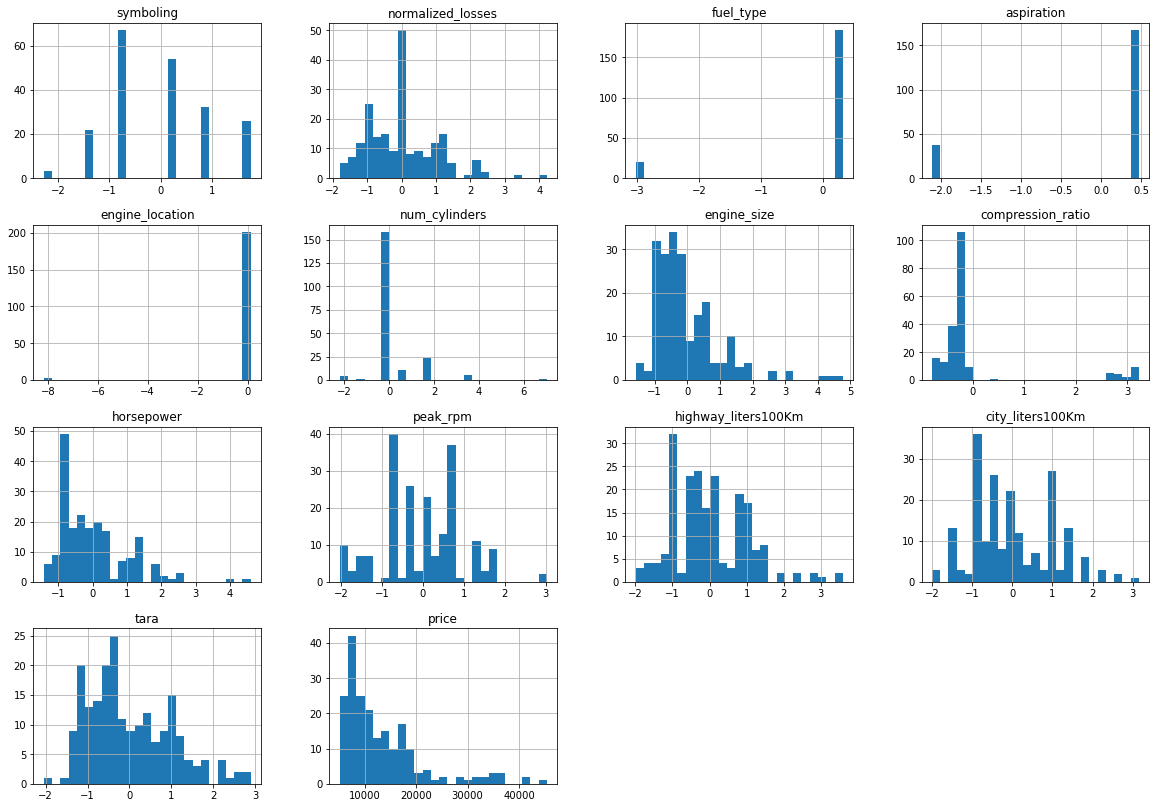

In [38]:
%matplotlib inline 
import matplotlib.pyplot as plt

normalized_cars.hist(bins=25,figsize=(20,14))

In [39]:
corr_matrix = normalized_cars.corr(method='pearson')
corr_matrix.head()

,symboling,normalized_losses,fuel_type,aspiration,engine_location,num_cylinders,engine_size,compression_ratio,horsepower,peak_rpm,highway_liters100Km,city_liters100Km,tara,price
symboling,1.000000,4.686949e-01,0.192995,0.056306,-2.151290e-01,-0.110977,-0.107229,-0.177413,0.077136,0.285462,-0.033552,0.059512,-0.229281,-0.083135
normalized_losses,0.468695,1.000000e+00,0.101464,0.006826,-1.045961e-17,0.108114,0.110998,-0.114548,0.205396,0.239413,0.178584,0.232815,0.097785,0.133999
fuel_type,0.192995,1.014639e-01,1.000000,0.400964,-4.027807e-02,0.025128,-0.069734,-0.984353,0.167924,0.477797,0.153215,0.235184,-0.217310,-0.110297
aspiration,0.056306,6.826386e-03,0.400964,1.000000,-5.750495e-02,0.048826,-0.108449,-0.295097,-0.234169,0.190508,-0.226825,-0.175490,-0.325044,-0.177464
engine_location,-0.215129,-1.045961e-17,-0.040278,-0.057505,1.000000e+00,-0.182899,-0.196881,0.019939,-0.314794,-0.193726,-0.090441,-0.184330,-0.050461,-0.331049


In [40]:
corr_matrix['price'].sort_values(ascending=False)

price                  1.000000
engine_size            0.861753
tara                   0.820831
highway_liters100Km    0.789540
city_liters100Km       0.770768
horsepower             0.749937
num_cylinders          0.688041
normalized_losses      0.133999
compression_ratio      0.071058
symboling             -0.083135
peak_rpm              -0.106311
fuel_type             -0.110297
aspiration            -0.177464
engine_location       -0.331049
Name: price, dtype: float64

A correlation between the `price` and the `other characteristics` will appear things that make sense and others such as that do not have it so much, as example of it, the price is related to the weight of the vehicle, so a heavier vehicle should be more expensive or a vehicle that spends more should be expensive.

________________________________________________

In this Dictionary where we will save the results of out experiments:

`store_rmse = {}` 

in the position of the key the best result of rmse will be entered and in the position of the value the characteristics of the model.

In [41]:
store_rmse = {} 

In [42]:
list_col = [] # copy of the columns with which we are going to work. 
for index in corr_matrix.columns:
    if index!='price':
        list_col.append(index)

In [43]:
list_col

['symboling',
 'normalized_losses',
 'fuel_type',
 'aspiration',
 'engine_location',
 'num_cylinders',
 'engine_size',
 'compression_ratio',
 'horsepower',
 'peak_rpm',
 'highway_liters100Km',
 'city_liters100Km',
 'tara']

### K-nearest Neighbors (KNN) Classification Model


Now it's time to create a function, one of the typical classification models of supervised learning is the K -nearest neighbor algorithm (**KNN**) with scikit-learn. 


A basic understanding of the **K-nearest neighbor (KNN)** algorithm is:

- The **KNN algorithm (K Nearest Neighbors)** tries to find the **K** points closest to a specific point in order to infer its value. K-nearest neighbor or K-NN algorithm basically creates an imaginary boundary to classify the data. 

This algorithm is used to solve the classification model problems. 

## Univariate model (k=5 default) 

Internally what we do is compare the distance between the data of the selected column with respect to our target column that in our case is the price, the idea is that the greater the output value the greater the distance between is the error between.

therefore our goal is to ensure that the value is as small as possible.

At this point we will leave the default value later we will modify it to see if we appreciate any improvement.

In [44]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [45]:
def knn_train_test_model_1(features, target_column_name, dataframe):
    #features = ['engine_size']
    
    train_df = dataframe.iloc[0:42] # dataframe debe ser normalized_cars
    test_df = dataframe.iloc[43:204]
    
    #offset_list = 1
    #hyper_params = [x for x in range(1,5)]
    mse_values = []
    
    # n_neighborsint, default=5
    knn = KNeighborsRegressor(algorithm='brute')
    knn.fit(train_df[features], train_df[target_column_name]) #features
    predictions = knn.predict(test_df[features])
    mse = mean_squared_error(test_df[target_column_name], predictions)
    mse_values.append(mse)
    
    rmse = (min(mse_values))**(1/2)
    return rmse

In [46]:
def test_Univariate_model_k5(list_col):
    rmse_features = {}
    for features in list_col:
        if features!='price':  #important avoid 
            rmse = knn_train_test_model_1([features], 'price', normalized_cars)
            rmse_features[rmse]=features
    #print('rmse value: \t  caracteristic: \n')
    
    lista_rmse_model_1 = []
    name_features_model_1 = []

    for x in range(2):
        if x == 0:
            for j in range(len(sorted(rmse_features.items()))):
                lista_rmse_model_1.append(sorted(rmse_features.items())[j][x])
                #print(sorted(rmse_features.items())[j][x]) # fila / columna
        elif x==1:
            K=0
            F=1
            for j in range(len(sorted(rmse_features.items()))):
                name_features_model_1.append(sorted(rmse_features.items())[j][F])
                #print(sorted(rmse_features.items())[j][F]) # fila / columna
                
    plant='Best K value hyperparameter:' 

    plt.scatter(lista_rmse_model_1, name_features_model_1 )

    plt.title("Univariate model (k=5 default)",fontsize=15)

    plt.scatter(lista_rmse_model_1[0], name_features_model_1[0], color="red" )
    plt.annotate(lista_rmse_model_1[0], (lista_rmse_model_1[0], name_features_model_1[0]),
                 (lista_rmse_model_1[0]+100, name_features_model_1[0]),
                 color="black", size=12)
    
    plt.show()          
    
    #return sorted(rmse_features.items()), lista_rmse_model_1, name_features_model_1
    return lista_rmse_model_1, name_features_model_1

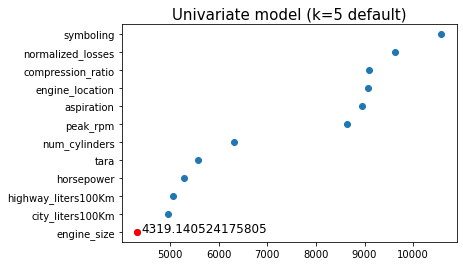

In [47]:
better_output = test_Univariate_model_k5(list_col)

In [48]:
def best_rmse_nhp(better_output, store_rmse):
    if type(better_output) is tuple:
        best_rmse=better_output[0][0]
        best_feature=better_output[1][0]
        
        store_rmse[best_rmse]=str(best_feature)
    print(' Best rmse value {rmse}: K=default  Optimal feature: {feature}: \n'.format(rmse=best_rmse,
                                                                                      feature=best_feature))

In [49]:
best_rmse_nhp(better_output, store_rmse)

 Best rmse value 4319.140524175805: K=default  Optimal feature: engine_size: 



The lowest value is given when introducing in the function the characteristic of `engine_size`, this feature being relevant in our search.

____________________________________________________________

## Univariate model (k=[1,3,5,7,9]) --- plot knn_train_test_model_2  return (optimal_hp, rmse, features)

One thing we can do with our function is to modify the value of **K**, to see if by modifying that value we can adjust more precisely if possible our model.

In [50]:
def knn_train_test_model_2(features, target_column_name, dataframe, k):
    from sklearn.metrics import mean_squared_error
    #features = ['engine_size']
    
    train_df = dataframe.iloc[0:42] # dataframe debe ser normalized_cars
    test_df = dataframe.iloc[43:204]
    
    offset_list = 1
    hyper_params = [x for x in range(1,k+offset_list,2)]
    mse_values = []
    rmse_values = []
    
    for hp in hyper_params:
        knn = KNeighborsRegressor(n_neighbors=hp, algorithm='brute')
        knn.fit(train_df[features], train_df[target_column_name]) #features
        predictions = knn.predict(test_df[features])
        
        mse = mean_squared_error(test_df['price'], predictions)
        mse_values.append(mse)
        rmse = (min(mse_values))**(1/2)
        rmse_values.append(rmse)
    
    offset_list = 1
    optimal_hp = mse_values.index(min(mse_values)) + offset_list
    
    return rmse, optimal_hp

In [51]:
def test_Univariate_model_k13579(list_col):
    rmse_features = {}
    for features in list_col:
        if features!='price':  #important avoid 
            unpack = knn_train_test_model_2([features], 'price', normalized_cars, 9)
            #print(unpack[1])
            (rmse, optimal_hp)=unpack
            rmse = unpack[0]
            rmse_features[rmse]=features
    #print('rmse value: \t  caracteristic: \n')
    
    lista_rmse_model_1 = []
    name_features_model_1 = []

    for x in range(2):
        if x == 0:
            for j in range(len(sorted(rmse_features.items()))):
                lista_rmse_model_1.append(sorted(rmse_features.items())[j][x])
                #print(sorted(rmse_features.items())[j][x]) # fila / columna
        elif x==1:
            K=0
            F=1
            for j in range(len(sorted(rmse_features.items()))):
                name_features_model_1.append(sorted(rmse_features.items())[j][x])
                #print(sorted(rmse_features.items())[j][F]) # fila / columna
                
    plant='Best K value hyperparameter:' 

    plt.scatter(lista_rmse_model_1, name_features_model_1 )

    plt.title("Univariate model (k={k})".format(k=unpack[1]),fontsize=15)

    plt.scatter(lista_rmse_model_1[0], name_features_model_1[0], color="red" )
    plt.annotate(lista_rmse_model_1[0], 
                 (lista_rmse_model_1[0], name_features_model_1[0]),
                 (lista_rmse_model_1[0]+100, name_features_model_1[0]),
                 color="black", size=12)
    plt.show()          
    
    return lista_rmse_model_1, name_features_model_1

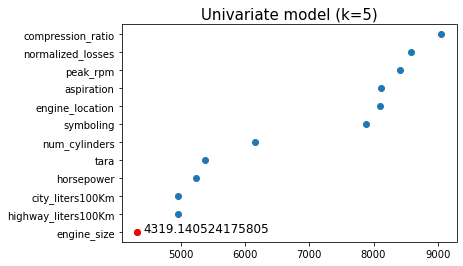

In [52]:
better_output = test_Univariate_model_k13579(list_col)

In [53]:
best_rmse_nhp(better_output, store_rmse)

 Best rmse value 4319.140524175805: K=default  Optimal feature: engine_size: 



###  Conclusiones sobre las dos gráficas  empezar a introducir el ausunto del over y underfitting


################################################### el cambio de orden en la columna de las features


Los dos modelos dan el mismo resultado

## Multivariate all features k=5 --- plot knn_train_test_model_3

In [54]:
list_col

['symboling',
 'normalized_losses',
 'fuel_type',
 'aspiration',
 'engine_location',
 'num_cylinders',
 'engine_size',
 'compression_ratio',
 'horsepower',
 'peak_rpm',
 'highway_liters100Km',
 'city_liters100Km',
 'tara']

In [55]:
def knn_train_all_features(features, target_column_name, dataframe):
    from sklearn.metrics import mean_squared_error
    
    train_df = dataframe.iloc[0:42] # dataframe debe ser normalized_cars
    test_df = dataframe.iloc[43:204]
    
    #hyper_params = [x for x in range(1,6)]
    mse_values = []
    rmse_values = []
    #hp=5
    
    knn = KNeighborsRegressor(algorithm='brute')
    knn.fit(train_df[features], train_df['price']) #features
    predictions = knn.predict(test_df[features])
    mse = mean_squared_error(test_df['price'], predictions)
    mse_values.append(mse)
    rmse = (min(mse_values))**(1/2)
    rmse_values.append(rmse)
    
    offset_list = 1
    optimal_hp = mse_values.index(min(mse_values)) + offset_list

    return rmse, optimal_hp

In [56]:
def test_Multivariate__model_k5(list_col):
    rmse_features = {}
    unpack = knn_train_all_features(list_col, 'price', normalized_cars)
    #print(unpack[1])
    (rmse, optimal_hp)=unpack
    rmse = unpack[0]
    
    rmse_features[rmse]='All features' # from list_col
    
    lista_rmse_model_1 = []
    name_features_model_1 = []

    for x in range(2):
        if x == 0:
            for j in range(len(sorted(rmse_features.items()))):
                lista_rmse_model_1.append(sorted(rmse_features.items())[j][x])
                #print(sorted(rmse_features.items())[j][x]) # fila / columna
        elif x==1:
            K=0
            F=1
            for j in range(len(sorted(rmse_features.items()))):
                name_features_model_1.append(sorted(rmse_features.items())[j][x])
                #print(sorted(rmse_features.items())[j][F]) # fila / columna         
    
    return lista_rmse_model_1, name_features_model_1

In [57]:
better_output = test_Multivariate__model_k5(list_col)

In [58]:
best_rmse_nhp(better_output, store_rmse)

 Best rmse value 4733.628590394608: K=default  Optimal feature: All features: 



# Aqui explico a modo de introduccion el fenomeno que sucede al elegir todas las caracteristica y el porque sucede que está relacionado con el under fitting y el overfitting




## Best 2 features k=5

Busqueda automatizada de las caracteristicas mas relevantes explico que podría hacerlo con los valores anteriores pero que prefiero hacerlo como ejercicio de busqueda personal.

In [59]:
def find_best_features_K_default(list_col):
    rmse_features = {}
    aux_list = []
    space = ' + '
    
    lista_rmse_model_1 = []
    name_features_model_1 = []
    
    for a in list_col:
        for b in list_col:
            if a!=b:
                aux_list.append(a)
                aux_list.append(b)
                unpack = knn_train_test_model_1(aux_list,'price', normalized_cars)
                (rmse)=unpack 
                text = str(a) + space + str(b)
                rmse_features[rmse] = text
                aux_list.clear()
    
    for x in range(2):
        if x == 0:
            for j in range(len(sorted(rmse_features.items()))):
                lista_rmse_model_1.append(sorted(rmse_features.items())[j][x])
                #print(sorted(rmse_features.items())[j][x]) # fila / columna
        elif x==1:
            K=0
            F=1
            for j in range(len(sorted(rmse_features.items()))):
                name_features_model_1.append(sorted(rmse_features.items())[j][F])
                #print(sorted(rmse_features.items())[j][F]) # fila / columna
    
    return lista_rmse_model_1, name_features_model_1

In [60]:
def graphics(unpack):
    
    lista_rmse_model_1 = unpack[0]
    
    name_features_model_1 = unpack[1]
    fig, (ax1) = plt.subplots(nrows=1, ncols=1,figsize=(10,18))

    plant='Best K value hyperparameter:' 
    
    plt.scatter(lista_rmse_model_1, name_features_model_1 )
    plt.title("Univariate model (k=5 default)",fontsize=15)
    plt.scatter(lista_rmse_model_1[0], name_features_model_1[0], color="red" )
    plt.annotate(lista_rmse_model_1[0], (lista_rmse_model_1[0], name_features_model_1[0]),
                 (lista_rmse_model_1[0]+100, name_features_model_1[0]),color="black", size=12)
             
    plt.show() 

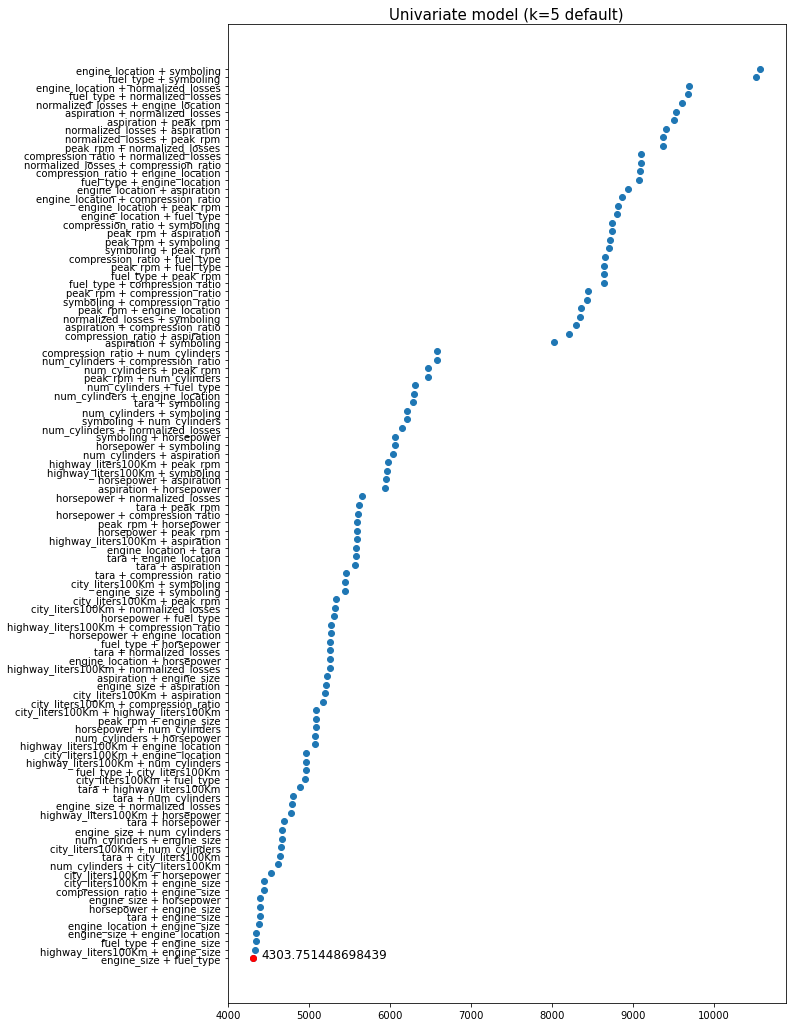

In [61]:
graphics(find_best_features_K_default(list_col))

In [62]:
better_output= find_best_features_K_default(list_col)

In [63]:
best_rmse_nhp(better_output, store_rmse)

 Best rmse value 4303.751448698439: K=default  Optimal feature: engine_size + fuel_type: 



In [64]:
set_list_1= ['engine_size','fuel_type']
if len(set_list_1)>0:
    for erase in set_list_1:
        list_col.remove(erase)

list_col

['symboling',
 'normalized_losses',
 'aspiration',
 'engine_location',
 'num_cylinders',
 'compression_ratio',
 'horsepower',
 'peak_rpm',
 'highway_liters100Km',
 'city_liters100Km',
 'tara']

In [65]:
def find_best_3features_K_default(list_col, set_list):
    rmse_features = {}
    aux_list = []
    space = ' + '
    
    lista_rmse_model_1 = []
    name_features_model_1 = []
    
    for a in list_col:
            aux_list.append(a)
            rmse = knn_train_test_model_1(aux_list,'price', normalized_cars)
            
            text = str(set_list[0]) + space + '\n' + str(set_list[1]) + space + '\n' \
            + str(a)
            
            rmse_features[rmse] = text
            aux_list.clear()
    
    for x in range(2):
        if x == 0:
            for j in range(len(sorted(rmse_features.items()))):
                lista_rmse_model_1.append(sorted(rmse_features.items())[j][x])
                #print(sorted(rmse_features.items())[j][x]) # fila / columna
        elif x==1:
            K=0
            F=1
            for j in range(len(sorted(rmse_features.items()))):
                name_features_model_1.append(sorted(rmse_features.items())[j][F])
                #print(sorted(rmse_features.items())[j][F]) # fila / columna
    
    return lista_rmse_model_1, name_features_model_1

## Best 3 features k=5 

In [66]:
better_output = find_best_3features_K_default(list_col, set_list_1)

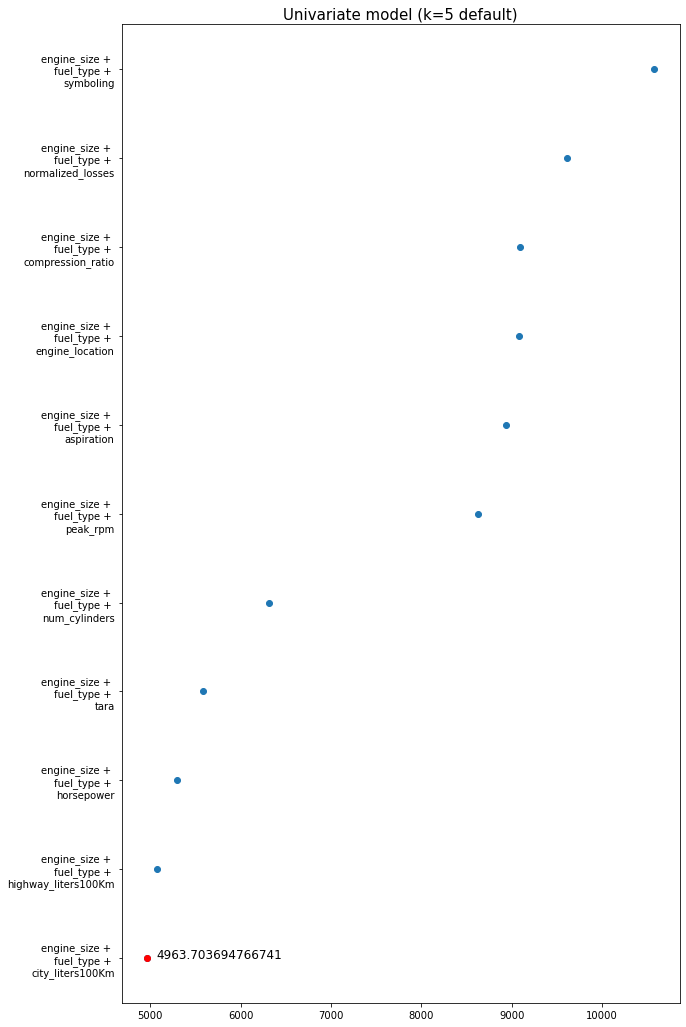

In [67]:
graphics(find_best_3features_K_default(list_col, set_list_1))

In [68]:
best_rmse_nhp(better_output, store_rmse)

 Best rmse value 4963.703694766741: K=default  Optimal feature: engine_size + 
fuel_type + 
city_liters100Km: 



In [69]:
store_rmse

{4319.140524175805: 'engine_size',
 4733.628590394608: 'All features',
 4303.751448698439: 'engine_size + fuel_type',
 4963.703694766741: 'engine_size + \nfuel_type + \ncity_liters100Km'}

## Best 4 features k=5 ## Best 4 features k=5 

Aqui debería explicar como funciona una vez he encontrado las caracteristicas y como las elimino de la lista para que no me interfiera.

In [70]:
 list_col= ['symboling','normalized_losses','fuel_type','aspiration',
            'engine_location','num_cylinders','engine_size','compression_ratio',
            'horsepower','peak_rpm','highway_liters100Km','city_liters100Km','tara']

In [71]:
## removing 'engine_size + fuel_type + ' from list_col

In [72]:
set_list_1= ['engine_size','fuel_type']
if len(set_list_1)>0:
    for erase in set_list_1:
        list_col.remove(erase)

list_col

['symboling',
 'normalized_losses',
 'aspiration',
 'engine_location',
 'num_cylinders',
 'compression_ratio',
 'horsepower',
 'peak_rpm',
 'highway_liters100Km',
 'city_liters100Km',
 'tara']

In [73]:
set_list_1

['engine_size', 'fuel_type']

In [74]:
def find_best_features_K_default(list_col, set_list):
    rmse_features = {}
    aux_list = []
    space = ' + '
    
    lista_rmse_model_1 = []
    name_features_model_1 = []
    
    for a in list_col:
        for b in list_col:
            if a!=b:
                aux_list.append(a)
                aux_list.append(b)
                unpack = knn_train_test_model_1(set_list + aux_list,'price', normalized_cars)
                (rmse)=unpack 
                text = str(set_list[0]) + space + str(set_list[1]) + space + str(a) + space + str(b)
                rmse_features[rmse] = text
                aux_list.clear()
    
    for x in range(2):
        if x == 0:
            for j in range(len(sorted(rmse_features.items()))):
                lista_rmse_model_1.append(sorted(rmse_features.items())[j][x])
                #print(sorted(rmse_features.items())[j][x]) # fila / columna
        elif x==1:
            K=0
            F=1
            for j in range(len(sorted(rmse_features.items()))):
                name_features_model_1.append(sorted(rmse_features.items())[j][F])
                #print(sorted(rmse_features.items())[j][F]) # fila / columna
    
    return lista_rmse_model_1, name_features_model_1, set_list

In [75]:
def graphics(unpack):
    
    lista_rmse_model_1 = unpack[0]
    
    name_features_model_1 = unpack[1] 
    
    fig, (ax1) = plt.subplots(nrows=1, ncols=1,figsize=(10,18))

    plant='Best K value hyperparameter:' 
    
    '''
    ### falta por implementar
    
    fig, (ax1) = plt.subplots(nrows=1, ncols=1,figsize=(15,18))
    ax1.scatter(lista_rmse_model_best_3, name_features_model_best_3)


    ax1.text(x=3600, y=80, s='Combination of features:',size=13, weight='bold')

    ax1.text(x=4100, y=82, s='Univariate model (k=default)',size=16, weight='bold')
    ax1.text(x=4100, y=80.5, s='Optimal features: ',size=16, weight='bold')
    ax1.text(x=4500, y=80.5, s=' {t1}'.format(t1=name_features_model_best_3[0] ),size=16)
    '''
    
    plt.scatter(lista_rmse_model_1, name_features_model_1 )
    plt.title("Univariate model (k=5 default)",fontsize=15)
    plt.scatter(lista_rmse_model_1[0], name_features_model_1[0], color="red" )
    plt.annotate(lista_rmse_model_1[0], (lista_rmse_model_1[0], name_features_model_1[0])
                 ,(lista_rmse_model_1[0]+20, name_features_model_1[0]), size = 12, color="black")
             
    plt.show() 

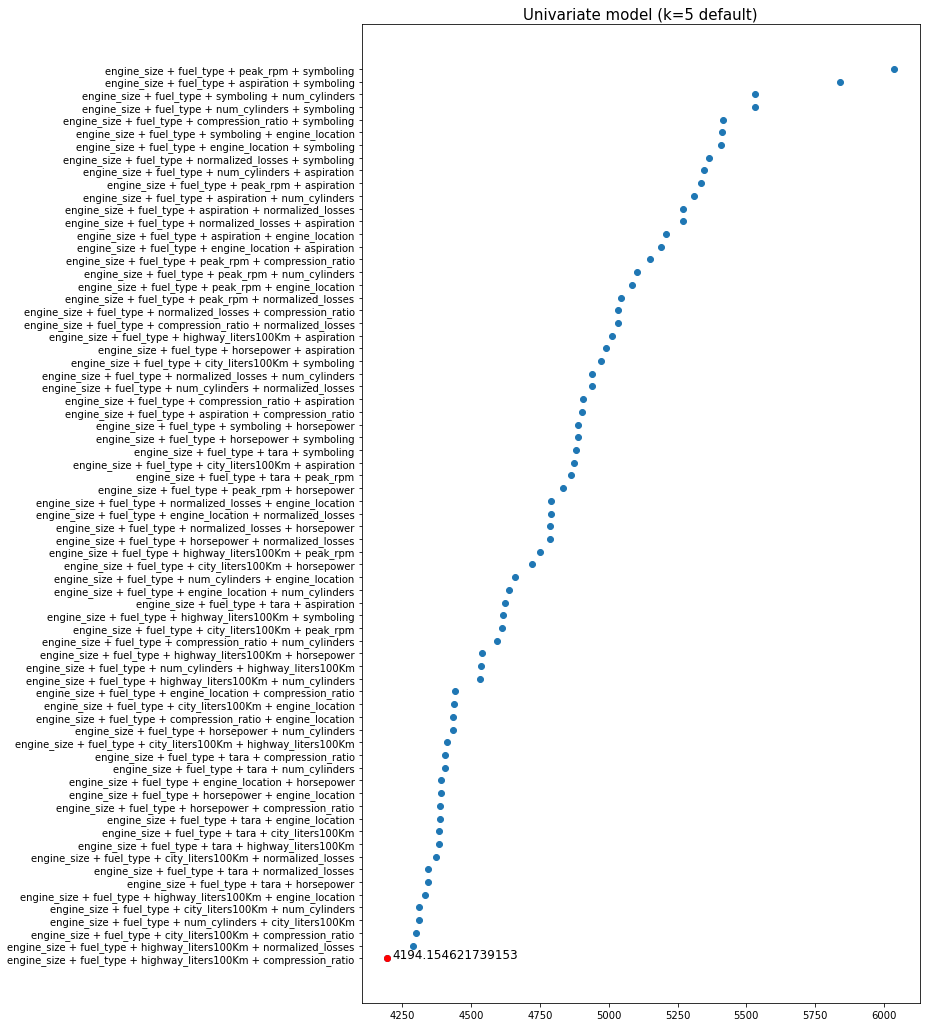

In [76]:
graphics(find_best_features_K_default(list_col, set_list_1))

In [77]:
better_output= find_best_features_K_default(list_col, set_list_1)
best_rmse_nhp(better_output, store_rmse)

 Best rmse value 4194.154621739153: K=default  Optimal feature: engine_size + fuel_type + highway_liters100Km + compression_ratio: 



In [78]:
store_rmse

{4319.140524175805: 'engine_size',
 4733.628590394608: 'All features',
 4303.751448698439: 'engine_size + fuel_type',
 4963.703694766741: 'engine_size + \nfuel_type + \ncity_liters100Km',
 4194.154621739153: 'engine_size + fuel_type + highway_liters100Km + compression_ratio'}

## Best 5 features k=5 

In [79]:
set_list_3 = []
set_list_2= ['highway_liters100Km','compression_ratio']
if len(set_list_2)>0:
    for erase in set_list_2:
        list_col.remove(erase)

set_list_3 = set_list_1 + set_list_2

In [80]:
set_list_3

['engine_size', 'fuel_type', 'highway_liters100Km', 'compression_ratio']

In [81]:
list_col

['symboling',
 'normalized_losses',
 'aspiration',
 'engine_location',
 'num_cylinders',
 'horsepower',
 'peak_rpm',
 'city_liters100Km',
 'tara']

In [82]:
def find_best_5features_K_default(list_col, set_list_3):
    rmse_features = {}
    aux_list = []
    space = ' + '
    
    lista_rmse_model_1 = []
    name_features_model_1 = []
    
    for a in list_col:
            aux_list.append(a)
            rmse = knn_train_test_model_1(aux_list,'price', normalized_cars)
            
            text = str(set_list_3[0]) + '\n' + space + str(set_list_3[1]) + '\n' \
            + space + str(set_list_3[2]) + '\n' + space + str(set_list_3[3]) + '\n' \
            + space + str(a)
            
            rmse_features[rmse] = text
            aux_list.clear()
    
    for x in range(2):
        if x == 0:
            for j in range(len(sorted(rmse_features.items()))):
                lista_rmse_model_1.append(sorted(rmse_features.items())[j][x])
                #print(sorted(rmse_features.items())[j][x]) # fila / columna
        elif x==1:
            K=0
            F=1
            for j in range(len(sorted(rmse_features.items()))):
                name_features_model_1.append(sorted(rmse_features.items())[j][F])
                #print(sorted(rmse_features.items())[j][F]) # fila / columna
    
    return lista_rmse_model_1, name_features_model_1

In [83]:
set_list_3

['engine_size', 'fuel_type', 'highway_liters100Km', 'compression_ratio']

In [84]:
def graphics(unpack):
    
    lista_rmse_model_1 = unpack[0]
    
    name_features_model_1 = unpack[1] 
    
    fig, (ax1) = plt.subplots(nrows=1, ncols=1,figsize=(8,12))

    plant='Best K value hyperparameter:' 
    
    '''
    ### falta por implementar
    
    fig, (ax1) = plt.subplots(nrows=1, ncols=1,figsize=(15,18))
    ax1.scatter(lista_rmse_model_best_3, name_features_model_best_3)


    ax1.text(x=3600, y=80, s='Combination of features:',size=13, weight='bold')

    ax1.text(x=4100, y=82, s='Univariate model (k=default)',size=16, weight='bold')
    ax1.text(x=4100, y=80.5, s='Optimal features: ',size=16, weight='bold')
    ax1.text(x=4500, y=80.5, s=' {t1}'.format(t1=name_features_model_best_3[0] ),size=16)
    '''
    
    plt.scatter(lista_rmse_model_1, name_features_model_1 )
    plt.title("Univariate model (k=5 default)",fontsize=15)
    plt.scatter(lista_rmse_model_1[0], name_features_model_1[0], color="red" )
    plt.annotate(lista_rmse_model_1[0], (lista_rmse_model_1[0], name_features_model_1[0])
                 , (lista_rmse_model_1[0]+80, name_features_model_1[0]), color="black", size=12)
             
    plt.show() 

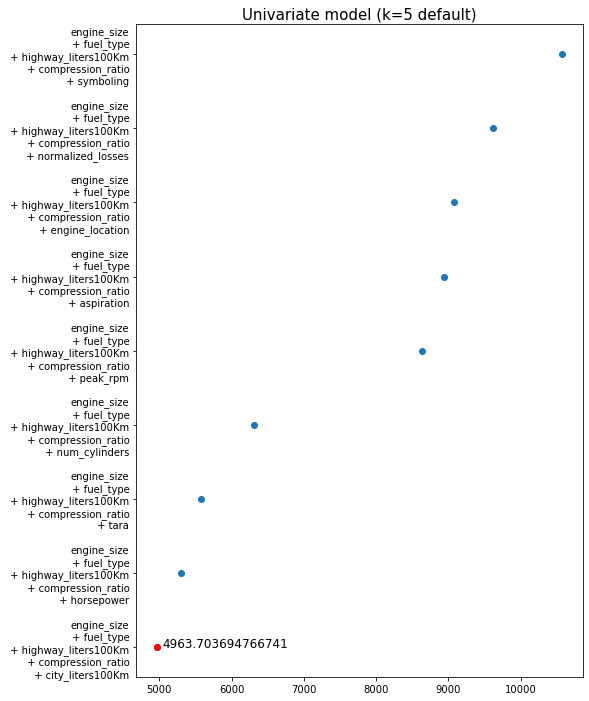

In [85]:
graphics(find_best_5features_K_default(list_col, set_list_3))

In [86]:
better_output = find_best_5features_K_default(list_col, set_list_3)

In [87]:
best_rmse_nhp(better_output, store_rmse)

 Best rmse value 4963.703694766741: K=default  Optimal feature: engine_size
 + fuel_type
 + highway_liters100Km
 + compression_ratio
 + city_liters100Km: 



In [88]:
store_rmse

{4319.140524175805: 'engine_size',
 4733.628590394608: 'All features',
 4303.751448698439: 'engine_size + fuel_type',
 4963.703694766741: 'engine_size\n + fuel_type\n + highway_liters100Km\n + compression_ratio\n + city_liters100Km',
 4194.154621739153: 'engine_size + fuel_type + highway_liters100Km + compression_ratio'}

### Best Model Performance based on characteristics

In [89]:
def graphics_performance(store_rmse):
    
    fig, (ax1) = plt.subplots(nrows=1, ncols=1,figsize=(6,4))    
    key_list = list(sorted(store_rmse.keys()))
    for a in key_list:
        ax1.scatter(a, store_rmse[a])
    
    #plt.annotate(key_list[0], (key_list[0], store_rmse[key_list[0]]), color="red")
    
    plt.scatter(key_list[0], store_rmse[key_list[0]], color="red" )
    
    
    for index in range(len(store_rmse)):
        plt.annotate(key_list[index], (key_list[index], store_rmse[key_list[index]]),
                     (key_list[index]+8, store_rmse[key_list[index]]), 
                     color="black", size=12)
    '''
    plt.annotate(key_list[1], (key_list[1], store_rmse[key_list[1]]),
                 (key_list[1]+8, store_rmse[key_list[1]]), 
                 color="black", size=12)
    
    plt.annotate(key_list[1], (key_list[1], store_rmse[key_list[1]]),
                 (key_list[1]+8, store_rmse[key_list[1]]), 
                 color="black", size=12) 
    
    '''

    plt.show()

In [90]:
def list_store_rmse(store_rmse):
    key_list = list(sorted(store_rmse.keys()))
    for a in key_list:
        print(a, store_rmse[a],"\n")

In [91]:
list_store_rmse(store_rmse)

4194.154621739153 engine_size + fuel_type + highway_liters100Km + compression_ratio 

4303.751448698439 engine_size + fuel_type 

4319.140524175805 engine_size 

4733.628590394608 All features 

4963.703694766741 engine_size
 + fuel_type
 + highway_liters100Km
 + compression_ratio
 + city_liters100Km 



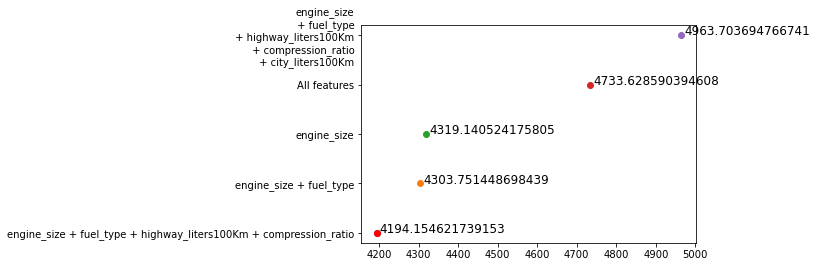

In [92]:
graphics_performance(store_rmse)

### Explicacion del rendimiento el porque y tal.

# Hyperparameter Tuning

For the top 3 models in the last step, vary the hyperparameter value from 1 to 25 and plot the resulting RMSE values.

In [93]:
store_K = {} # la clave seran los valores de rmse y los valores la k y features

In [94]:
def best_rmse_value_K(better_output, store_K):
    best_rmse=better_output[0][0]
    best_feature=better_output[1][0]
    K=better_output[2]
    
    store_K[best_rmse]=str(best_feature)
    print('Best rmse value: {rmse} optimal feature: {feature} K cicles = 25 best K={k} \n'.format(rmse=best_rmse,
                                                                                                  k=K,
                                                                                                  feature=best_feature))

### Engine size 

In [95]:
list_col = ['symboling','normalized_losses','fuel_type','aspiration','engine_location','num_cylinders',
            'engine_size','compression_ratio','horsepower','peak_rpm','highway_liters100Km',
            'city_liters100Km','tara']

In [96]:
def test_Univariate_model_k13579(list_col):
    rmse_features = {}
    for features in list_col:
        if features!='price':  #important avoid 
            unpack = knn_train_test_model_2([features], 'price', normalized_cars, 25)
            #print(unpack[1])
            (rmse, optimal_hp)=unpack
            rmse = unpack[0]
            rmse_features[rmse]=features
    #print('rmse value: \t  caracteristic: \n')
    
    lista_rmse_model_1 = []
    name_features_model_1 = []

    for x in range(2):
        if x == 0:
            for j in range(len(sorted(rmse_features.items()))):
                lista_rmse_model_1.append(sorted(rmse_features.items())[j][x])
                #print(sorted(rmse_features.items())[j][x]) # fila / columna
        elif x==1:
            K=0
            F=1
            for j in range(len(sorted(rmse_features.items()))):
                name_features_model_1.append(sorted(rmse_features.items())[j][x])
                #print(sorted(rmse_features.items())[j][F]) # fila / columna
                
    plant='Best K value hyperparameter:' 

    plt.scatter(lista_rmse_model_1, name_features_model_1 )

    plt.title("Univariate model (optimal k={k})".format(k=unpack[1]),fontsize=15)

    plt.scatter(lista_rmse_model_1[0], name_features_model_1[0], color="red" )
    plt.annotate(lista_rmse_model_1[0], 
                 (lista_rmse_model_1[0], name_features_model_1[0]),
                 (lista_rmse_model_1[0]+100, name_features_model_1[0]),
                 color="black", size=12)
    plt.show()          
    
    return lista_rmse_model_1, name_features_model_1, optimal_hp

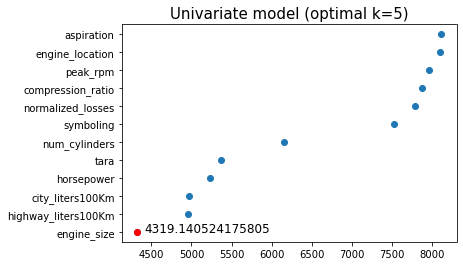

In [97]:
better_output = test_Univariate_model_k13579(list_col)

In [98]:
best_rmse_value_K(better_output, store_K)

Best rmse value: 4319.140524175805 optimal feature: engine_size K cicles = 25 best K=5 



### Engine y fuel

In [99]:
def find_best_2_features_K_25(list_col):
    rmse_features = {}
    aux_list = []
    space = ' + '
    
    lista_rmse_model_1 = []
    name_features_model_1 = []
    
    for a in list_col:
        for b in list_col:
            if a!=b:
                aux_list.append(a)
                aux_list.append(b)
                unpack = knn_train_test_model_2(aux_list,'price', normalized_cars, 25)
                
                (rmse, optimal_hp)=unpack
                rmse = unpack[0]
                
                text = str(a) + space + str(b)
                rmse_features[rmse]=text
                
                aux_list.clear()
    
    for x in range(2):
        if x == 0:
            for j in range(len(sorted(rmse_features.items()))):
                lista_rmse_model_1.append(sorted(rmse_features.items())[j][x])
                #print(sorted(rmse_features.items())[j][x]) # fila / columna
        elif x==1:
            K=0
            F=1
            for j in range(len(sorted(rmse_features.items()))):
                name_features_model_1.append(sorted(rmse_features.items())[j][F])
                #print(sorted(rmse_features.items())[j][F]) # fila / columna
    
    return lista_rmse_model_1, name_features_model_1, optimal_hp

In [100]:
def graphics(unpack):
    
    lista_rmse_model_1 = unpack[0]
    
    name_features_model_1 = unpack[1]
    fig, (ax1) = plt.subplots(nrows=1, ncols=1,figsize=(10,18))

    plant='Best K value hyperparameter:' 
    
    plt.scatter(lista_rmse_model_1, name_features_model_1 )
    plt.title("Univariate model (k=5 default)",fontsize=15)
    plt.scatter(lista_rmse_model_1[0], name_features_model_1[0], color="red" )
    plt.annotate(lista_rmse_model_1[0], (lista_rmse_model_1[0], name_features_model_1[0]),
                 (lista_rmse_model_1[0]+100, name_features_model_1[0]),color="black", size=12)
             
    plt.show() 

In [101]:
better_output = find_best_2_features_K_25(list_col)

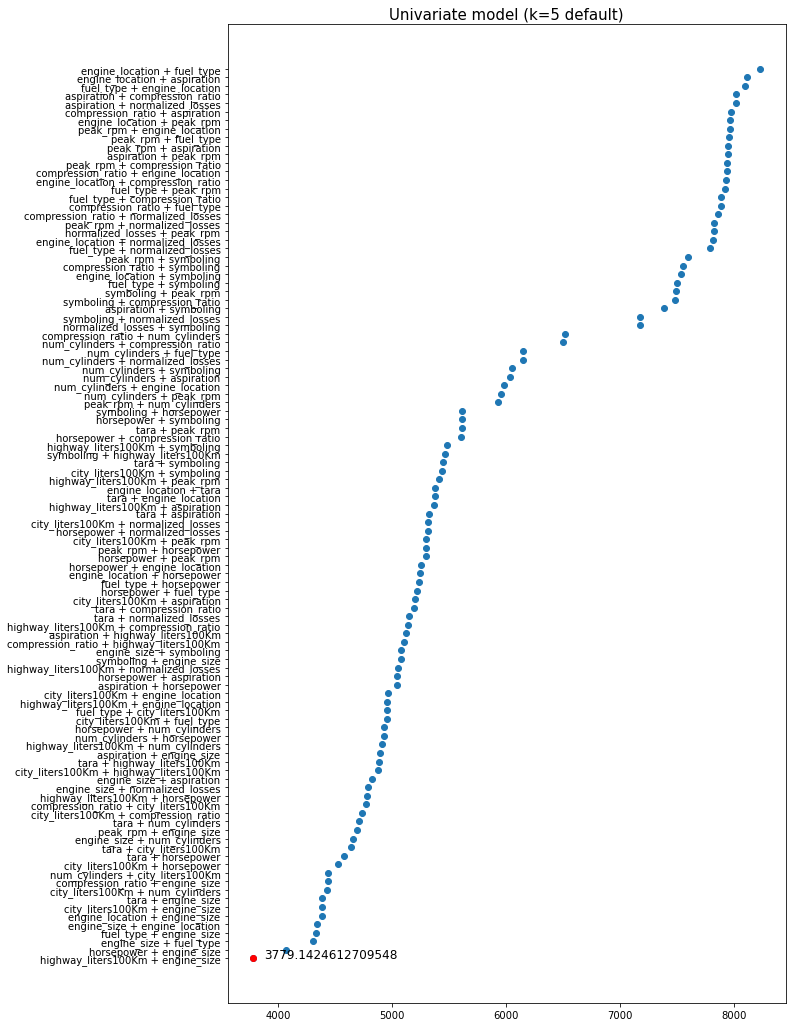

In [102]:
graphics(better_output)

In [103]:
best_rmse_value_K(better_output,store_K)

Best rmse value: 3779.1424612709548 optimal feature: highway_liters100Km + engine_size K cicles = 25 best K=3 



### engine fuel fuel type highway compression



In [104]:
def find_best_4_features_K_25(list_col, set_list):
    rmse_features = {}
    aux_list = []
    space = ' + '
    
    lista_rmse_model_1 = []
    name_features_model_1 = []
    
    for a in list_col:
        for b in list_col:
            if a!=b:
                aux_list.append(a)
                aux_list.append(b)
                
                unpack = knn_train_test_model_2(set_list + aux_list,'price', normalized_cars, 25)
                (rmse, optimal_hp)=unpack
                
                rmse = unpack[0]
                
                text = str(set_list[0]) + \
                    space + str(set_list[1]) + \
                    space + str(a) + space + str(b)
                
                rmse_features[rmse]=text
                aux_list.clear()
    
    for x in range(2):
        if x == 0:
            for j in range(len(sorted(rmse_features.items()))):
                lista_rmse_model_1.append(sorted(rmse_features.items())[j][x])
                #print(sorted(rmse_features.items())[j][x]) # fila / columna
        elif x==1:
            K=0
            F=1
            for j in range(len(sorted(rmse_features.items()))):
                name_features_model_1.append(sorted(rmse_features.items())[j][F])
                #print(sorted(rmse_features.items())[j][F]) # fila / columna
    
    return lista_rmse_model_1, name_features_model_1, optimal_hp

In [105]:
store_K

{4319.140524175805: 'engine_size',
 3779.1424612709548: 'highway_liters100Km + engine_size'}

In [106]:
set_list_1= ['engine_size','fuel_type']
if len(set_list_1)>0:
    for erase in set_list_1:
        list_col.remove(erase)

list_col

['symboling',
 'normalized_losses',
 'aspiration',
 'engine_location',
 'num_cylinders',
 'compression_ratio',
 'horsepower',
 'peak_rpm',
 'highway_liters100Km',
 'city_liters100Km',
 'tara']

In [107]:
better_output = find_best_4_features_K_25(list_col, set_list_1)

In [108]:
best_rmse_value_K(better_output, store_K)

Best rmse value: 3779.1424612709548 optimal feature: engine_size + fuel_type + highway_liters100Km + engine_location K cicles = 25 best K=4 



In [109]:
store_K

{4319.140524175805: 'engine_size',
 3779.1424612709548: 'engine_size + fuel_type + highway_liters100Km + engine_location'}

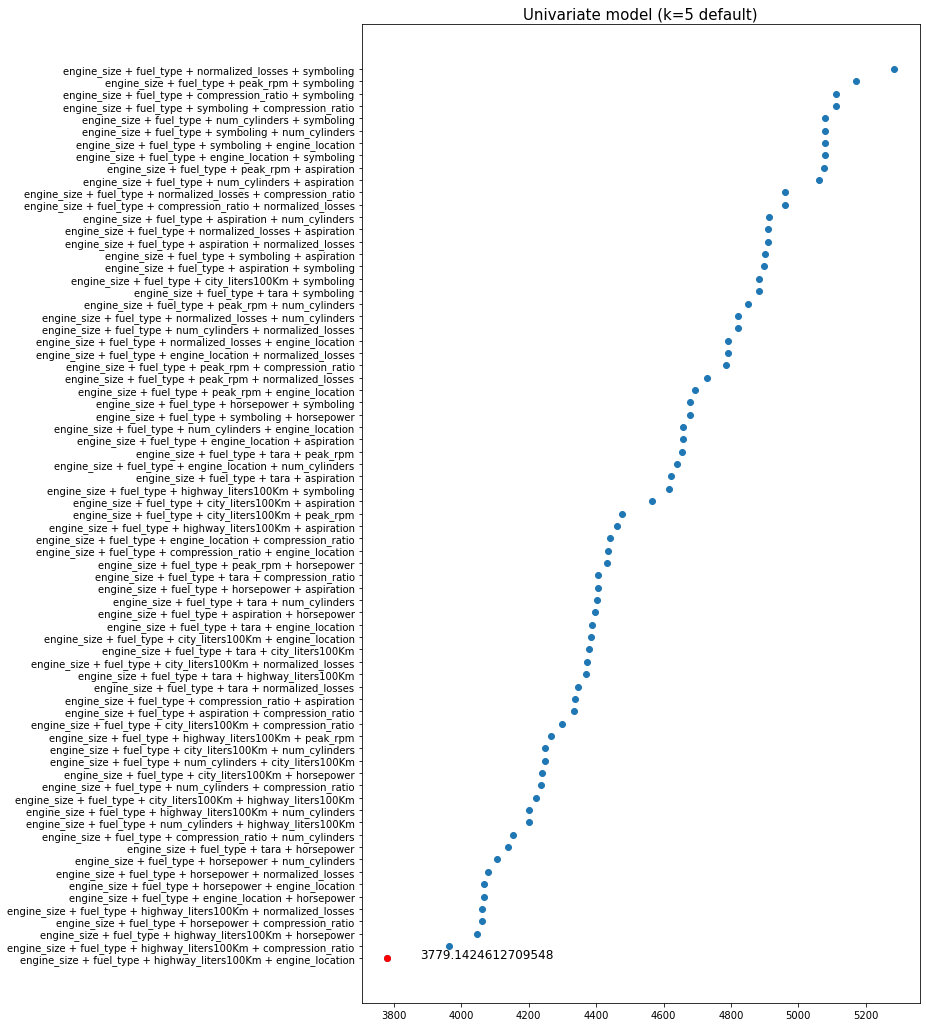

In [110]:
graphics(better_output)

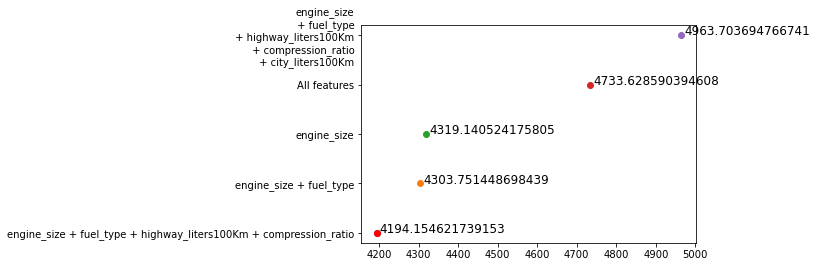

In [111]:
graphics_performance(store_rmse)

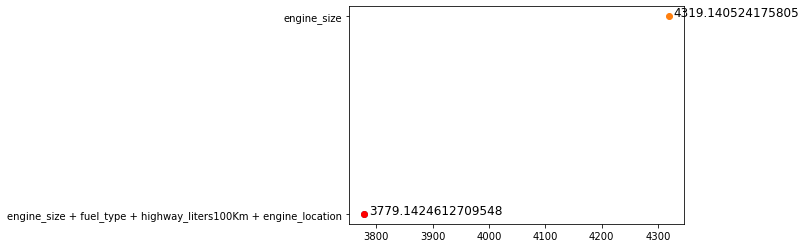

In [112]:
graphics_performance(store_K)